# Problem 3 - Answers

The data in the file `data.txt` shows temperature and electron concentration for n-type silicon doped with phosphorus atoms. Using this data find
1. The concentration of the phosphorus atoms
2. The dopant ionisation energy
3. The band gap energy

In [1]:
import numpy as np
from matplotlib import pyplot as plt

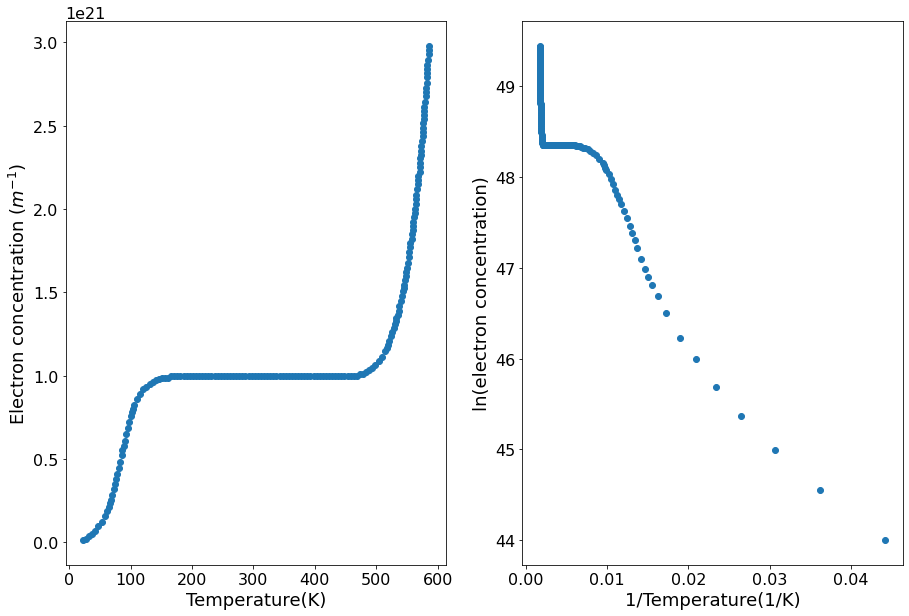

In [2]:
temp, e_conc = np.loadtxt("data.txt", unpack=True)
inverse_temp = 1/temp
ln_e_conc = np.log(e_conc)

params = {
'axes.labelsize': 18,
'font.size': 18,
'legend.fontsize': 18,
'xtick.labelsize': 16,
'ytick.labelsize': 16,
'figure.figsize': [15, 10] 
}
plt.rcParams.update(params)
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.scatter(temp, e_conc)
ax1.set(xlabel="Temperature(K)",
       ylabel="Electron concentration ($m^{-1}$)")

ax2.scatter(inverse_temp, ln_e_conc)
ax2.set(xlabel="1/Temperature(1/K)",
       ylabel="ln(electron concentration)")

plt.show()

1. The dopant concentration can be found by looking at the electron concentration in the flat portion of the graph. In this region the electron concentration is the same as the dopant concentration. In this case the dopant concentration is $1\times10^{21}$.

2. The dopant ionisation energy can be found by a linear fit of the freeze-out region of the graph. In our case this is at inverse temperatures greater than 0.02 K$^{-1}$. The gradient will be $-E_d/2k_b$.

The dopant ionisation energy is 2.34e-21


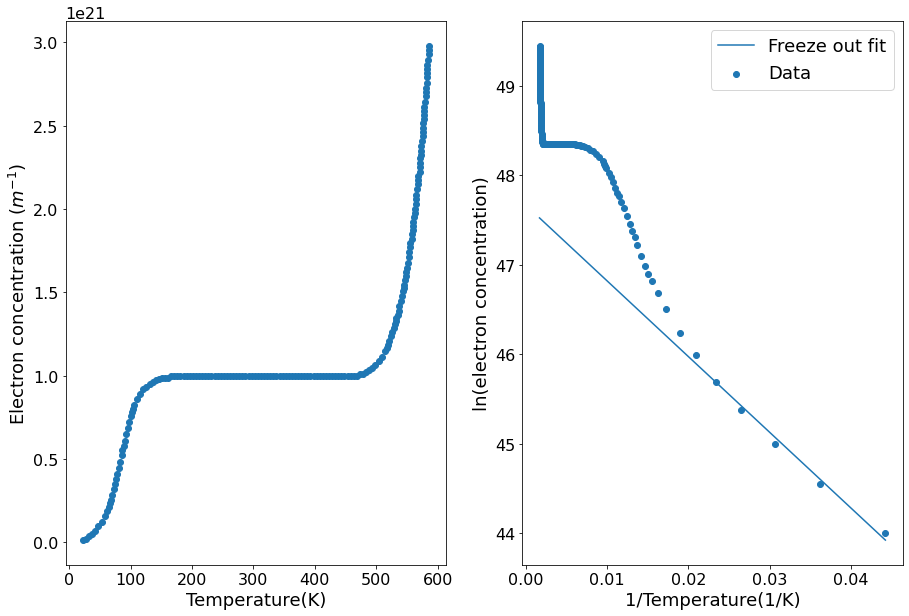

In [3]:
kb = 1.38064852e-23

# Select data in freeze out region
freeze_out_indicies = np.where(inverse_temp > 0.02)
freeze_out_temp = inverse_temp[freeze_out_indicies]
freeze_out_concentration = ln_e_conc[freeze_out_indicies]

fit_freeze_out = np.polyfit(freeze_out_temp, freeze_out_concentration, 1)
function_freeze_out = np.poly1d(fit_freeze_out)
gradient = fit_freeze_out[0]

E_d = -gradient * 2 * kb

print("The dopant ionisation energy is %.2e" % E_d)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.scatter(temp, e_conc)
ax1.set(xlabel="Temperature(K)",
       ylabel="Electron concentration ($m^{-1}$)")

ax2.scatter(inverse_temp, ln_e_conc, label="Data")
ax2.plot(inverse_temp, function_freeze_out(inverse_temp), label="Freeze out fit")
ax2.set(xlabel="1/Temperature(1/K)",
       ylabel="ln(electron concentration)")
ax2.legend()

plt.show()

3. The band gap energy can be found by a linear fit of the intrinsic region of the graph. In our case this is at inverse temperatures less than 0.002 K$^{-1}$. The gradient will be $-E_g/2k_b$.

The band gap energy is 1.12e-19


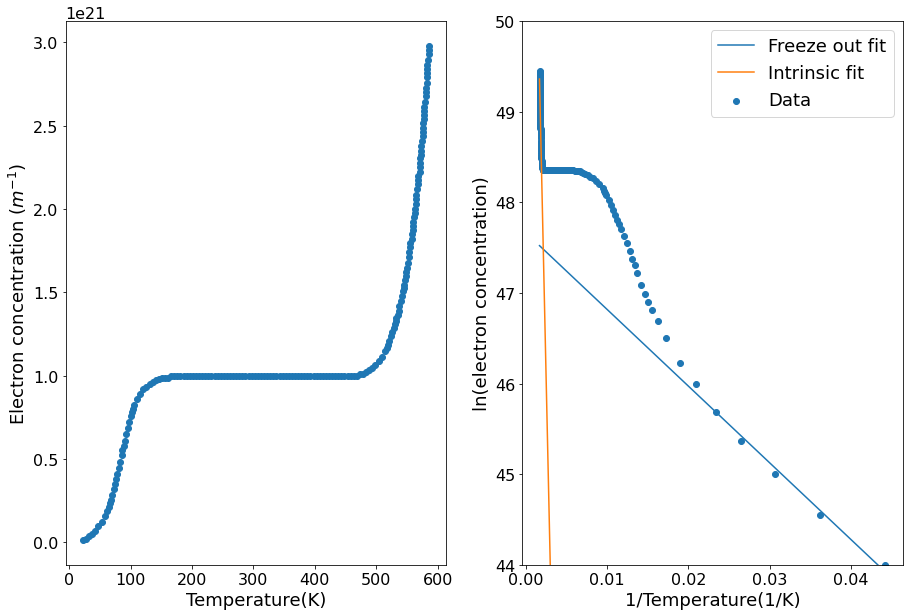

In [4]:
# Select data in intrinsic region
intrinsic_indicies = np.where(inverse_temp < 0.002)
intrinsic_temp = inverse_temp[intrinsic_indicies]
intrinsic_concentration = ln_e_conc[intrinsic_indicies]

fit_intrinsic = np.polyfit(intrinsic_temp, intrinsic_concentration, 1)
function_intrinsic = np.poly1d(fit_intrinsic)
gradient = fit_intrinsic[0]

E_d = -gradient * 2 * kb

print("The band gap energy is %.2e" % E_d)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.scatter(temp, e_conc)
ax1.set(xlabel="Temperature(K)",
       ylabel="Electron concentration ($m^{-1}$)")

ax2.scatter(inverse_temp, ln_e_conc, label="Data")
ax2.plot(inverse_temp, function_freeze_out(inverse_temp), label="Freeze out fit")
ax2.plot(inverse_temp, function_intrinsic(inverse_temp), label="Intrinsic fit")
ax2.set(xlabel="1/Temperature(1/K)",
       ylabel="ln(electron concentration)",
       ylim=[44, 50])
ax2.legend()

plt.show()